# Problem Statement: Customer Segmentation


Develop a customer segmentation strategy to enhance marketing and customer relationship management by identifying distinct groups of customers based on their behavior, preferences, and demographics. The goal is to optimize resource allocation, personalize marketing efforts, and improve overall customer satisfaction, ultimately leading to increased customer retention and business profitability.



# 1. IMPORTING LIBRARIES

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import HDBSCAN
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import mutual_info_score, adjusted_rand_score

import warnings
warnings.filterwarnings('ignore')

# 2. DATA COLLECTION

In [6]:
#Loading the data from csv file to a Pandas DataFrame
customer_data = pd.read_csv('Mall_Customers.csv')

In [7]:
customer_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# 3. DATA PRE-PROCESSING

In [4]:
# first 5 rows in the dataframe
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
#last 5 rows in the  dataframe
customer_data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
#Finding the number of rows and columns
customer_data.shape

(200, 5)

In [7]:
customer_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [8]:
customer_data.size

1000

In [9]:
customer_data.ndim

2

In [10]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
#Information about dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
customer_data.isna()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [13]:
#checking for missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<Axes: >

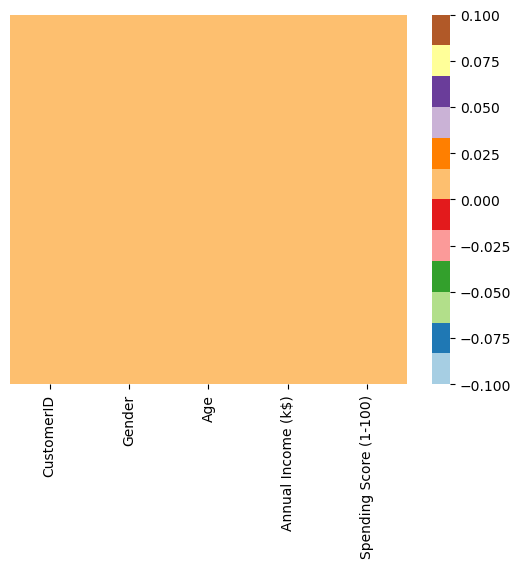

In [8]:
 #Visualizing Null Values after dropping unwanted Features
sns.heatmap(customer_data.isnull(), yticklabels=False, cmap="Paired")

# 4. STATISTICS TECHNIQUES USING NUMPY

In [16]:
# choosing the Annual Income Column & Spending Score column
X = customer_data.iloc[:,[3,4]].values
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [17]:
#finding the max value
np.max(X)

137

In [18]:
#finding the min value
np.min(X)

1

In [19]:
#finding the range
range1 = np.max(X) - np.min(X)
range1

136

In [20]:
#finding the mean
np.mean(X)

55.38

In [21]:
#finding the median
np.median(X)

54.0

In [43]:
#finding the mode of the data
stats.mode(X)

ModeResult(mode=array([[54, 42]], dtype=int64), count=array([[12,  8]]))

In [23]:
#finding the standard deviation
np.std(X)

26.491236286742073

In [24]:
#finding the variance of the data
np.var(X)

701.7855999999999

In [25]:
#finding the skewness and kurtosis 
from scipy.stats import skew,kurtosis
skewness = skew(X)
kurt = kurtosis(X)

print(skewness)
print(kurtosis)

[ 0.31942368 -0.04686531]
<function kurtosis at 0x000002846B9D9280>


# 5. PERFORMING EXPLORATORY DATA ANALYSIS

<AxesSubplot:>

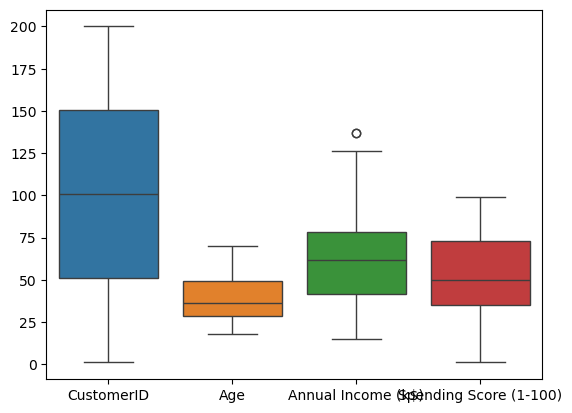

In [26]:
#Box plot for customer data
sns.boxplot(customer_data)

<Axes: >

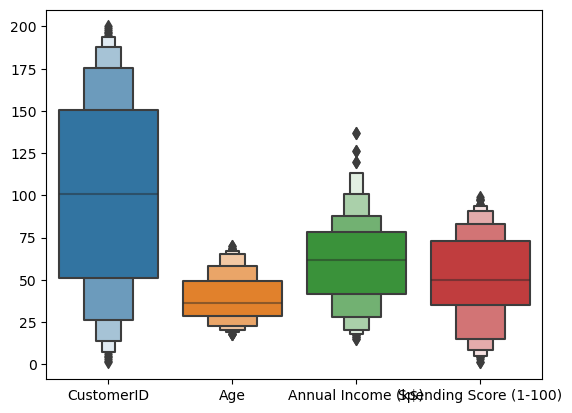

In [24]:
#Boxen plot for customer data
sns.boxenplot(customer_data)

<AxesSubplot:ylabel='Age'>

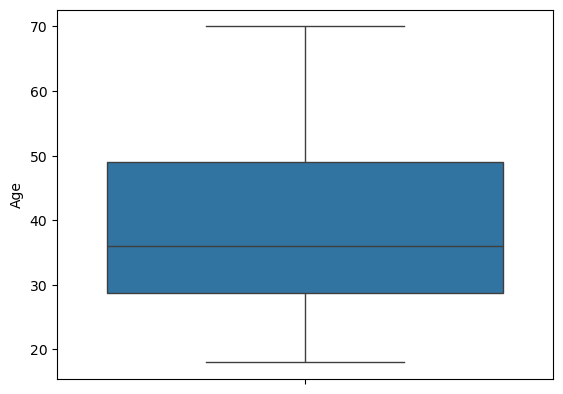

In [27]:
#Box Plot for customer's age range
sns.boxplot(customer_data.Age)

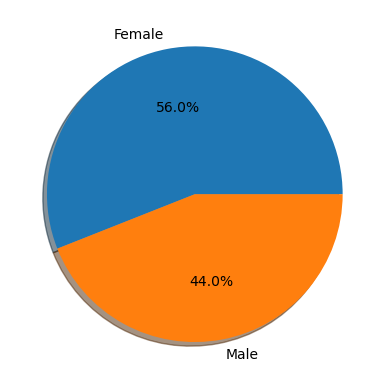

In [28]:
#pie chart for determinng the customer's age percentage
df =customer_data.groupby('Gender')['Gender'].count()
plt.pie(df,labels=df.index,autopct='%1.1f%%',shadow=True)
plt.show()

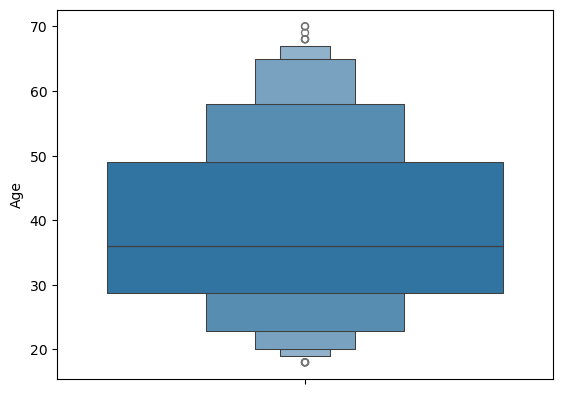

In [29]:
#boxenplot for customer's age to get a deeper analysis
sns.boxenplot(customer_data.Age)
plt.show()

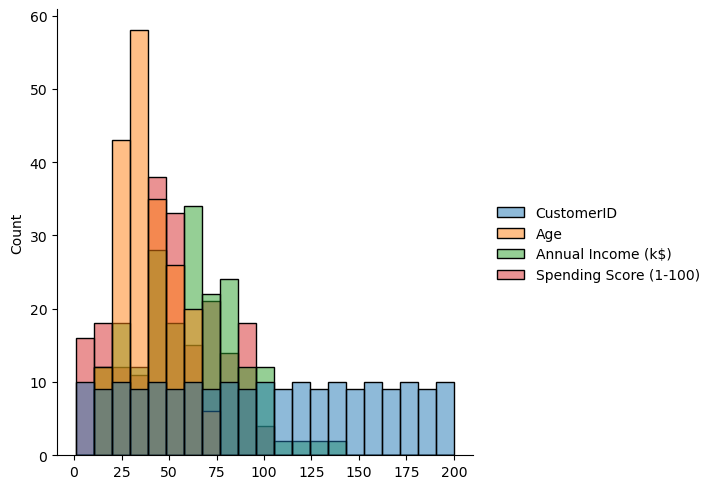

In [30]:
#distplot for customer data
sns.displot(customer_data)

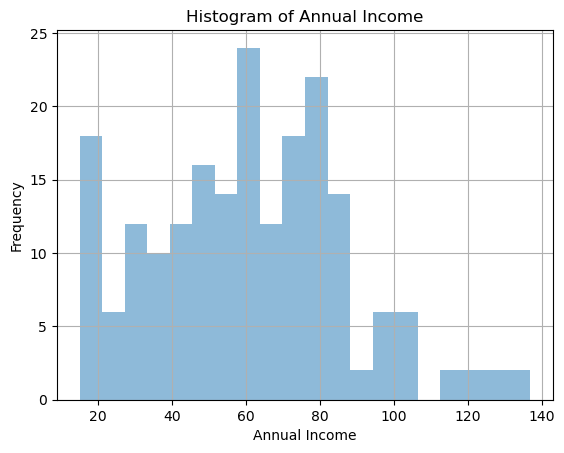

In [31]:
#histogram for Annual Income
plt.hist(customer_data['Annual Income (k$)'], bins=20, alpha=0.5)
plt.title('Histogram of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

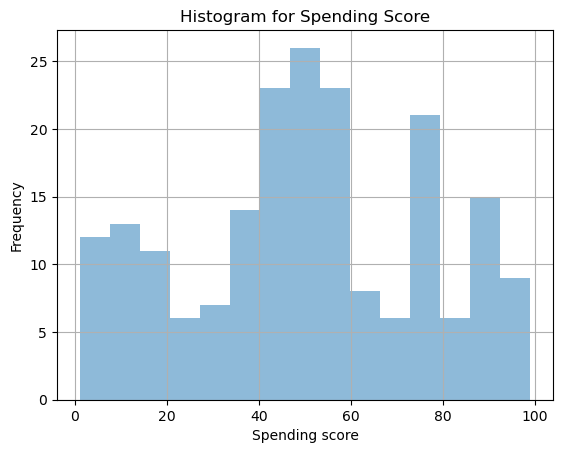

In [32]:
#histogram for Spending score
plt.hist(customer_data['Spending Score (1-100)'],bins=15,alpha=0.5)
plt.title('Histogram for Spending Score')
plt.xlabel('Spending score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<AxesSubplot:ylabel='CustomerID'>

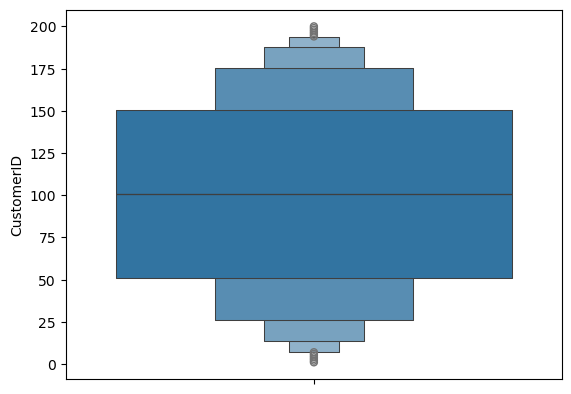

In [33]:
#boxen plot for customer id
sns.boxenplot(customer_data.CustomerID)

<AxesSubplot:ylabel='Age'>

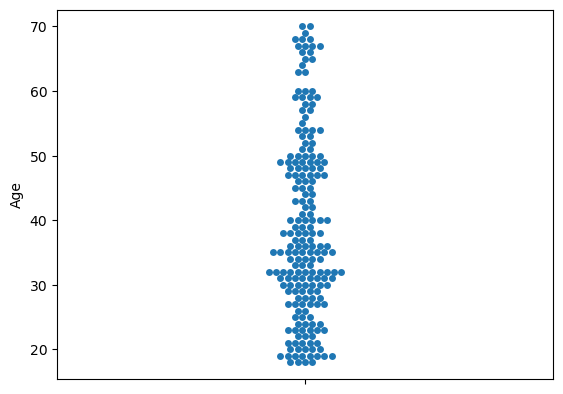

In [34]:
#swarmplot for customer age
sns.swarmplot(customer_data.Age)

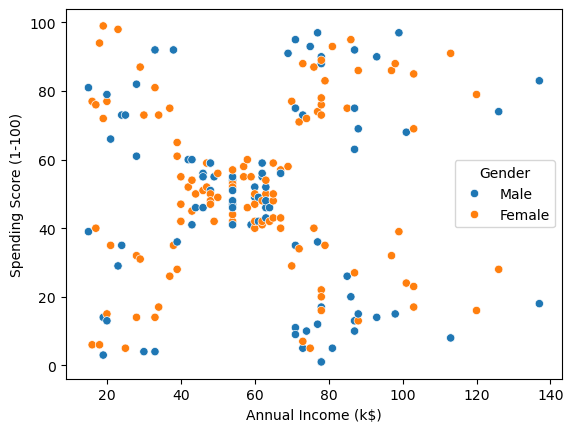

In [35]:
#scatter plot for the customer data
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=customer_data,hue='Gender')
plt.show()

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

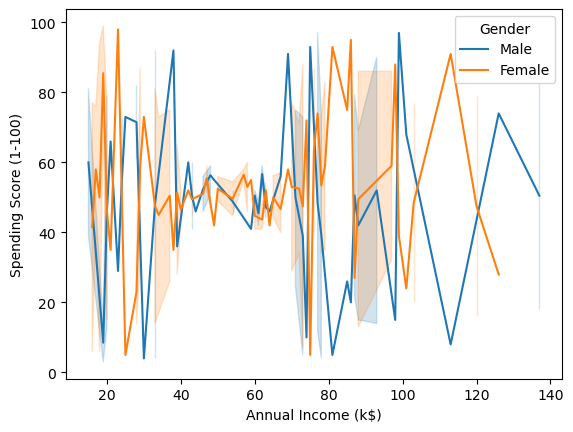

In [36]:
#line plot for the customer data
sns.lineplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=customer_data,hue='Gender')

# 6. ALGORITHMS 

# A) K-Means Clustering

i) K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters.<br>
ii) Here K defines the number of pre-defined clusters that need to be created in the process.<br>
iii) It allows us to cluster the data into different groups and a convenient way to discover the categories of groups in the unlabeled dataset.<br>
iv) It is a centroid-based algorithm, where each cluster is associated with a centroid.

In [46]:
#finding wcss value for different number of clusters
#WCSS -> Within Clusters Sum of Squares
wcss=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

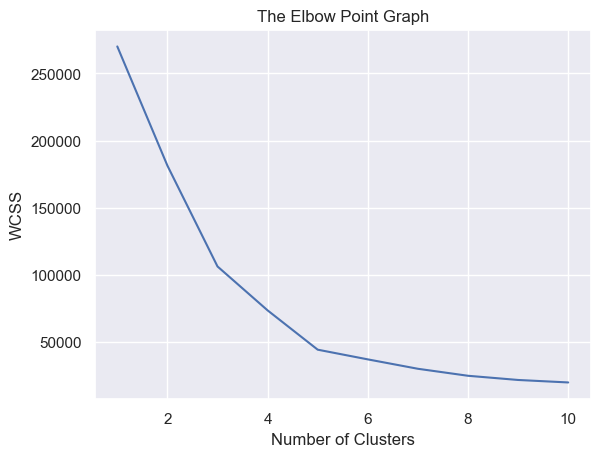

In [108]:
#plot an elbow point graph or cut off point graph

sns.set()#basic requirement of graph
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

After determining the optimal number of clusters which is 5, we proceed with the training of the K-Means Clustering Model


In [50]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=0)#random state can take any number
#return a label for each datapoint based on their cluster
Y = kmeans.fit_predict(X)
print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


The 5 Clusters are denoted as 0 1 2 3 4 <br>
For visualizing purpose, we denote 0 for Annual income and 1 for Spending score


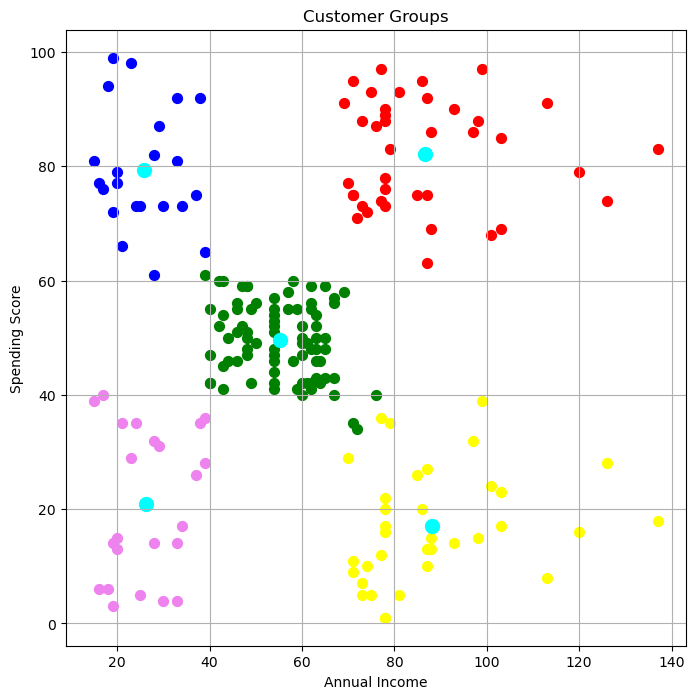

In [52]:
#ploting all the clusters and their centroids

#0-->represents first column(Annual income) and 1-->represents second column(Spending score)

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c='green',label='Cluster 1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c='red',label='Cluster 2')
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c='yellow',label='Cluster 3')
plt.scatter(X[Y==3,0],X[Y==3,1],s=50,c='violet',label='Cluster 4')
plt.scatter(X[Y==4,0],X[Y==4,1],s=50,c='blue',label='Cluster 5')

#plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='cyan',label='centroids')
#[:0]-->0 represents x axis of centroid and [:,1]-->1 represents Y axis of centroid

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.grid(True)
plt.show()

# B) K-Mediods Clustering

i) K-medoids is an unsupervised method with unlabelled data to be clustered.<br>
ii)It is an improvised version of the K-Means algorithm mainly designed to deal with outlier data sensitivity.<br>
iii) Compared to other partitioning algorithms, the algorithm is simple, fast, and easy to implement.<br>
iv) Instead of centroids as reference points in K-Means algorithms, the K-Medoids algorithm takes a Medoid as a reference point.<br>
v) A Medoid is a point in the cluster from which the sum of distances to other data points is minimal.


In [56]:
from sklearn_extra.cluster import KMedoids
kmedoids=KMedoids(n_clusters=5,random_state=0)
kmedoids.fit(X)
labels=kmedoids.labels_

In [57]:
#Add cluster labels to the data
customer_data['Kmedoids_Labels']=labels

In [58]:
customer_data['Kmedoids_Labels'].value_counts()

Kmedoids_Labels
2    60
1    46
3    39
4    33
0    22
Name: count, dtype: int64

In [61]:
#converting the gender in terms of 0 and 1
customer_data['Gender'] = customer_data['Gender'].replace({"Male":0,"Female":1}).to_frame(name='Gender')

In [62]:
#Study cluster profiles
customer_data.groupby('Kmedoids_Labels').mean()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Kmedoids_Labels,,,,,
0,23.090909,0.590909,25.272727,25.727273,79.363636
1,40.217391,0.630435,45.347826,35.217391,35.521739
2,99.050000,0.566667,41.416667,60.183333,48.716667
3,162.000000,0.538462,32.692308,86.538462,82.128205
4,166.090909,0.454545,41.454545,89.090909,16.181818


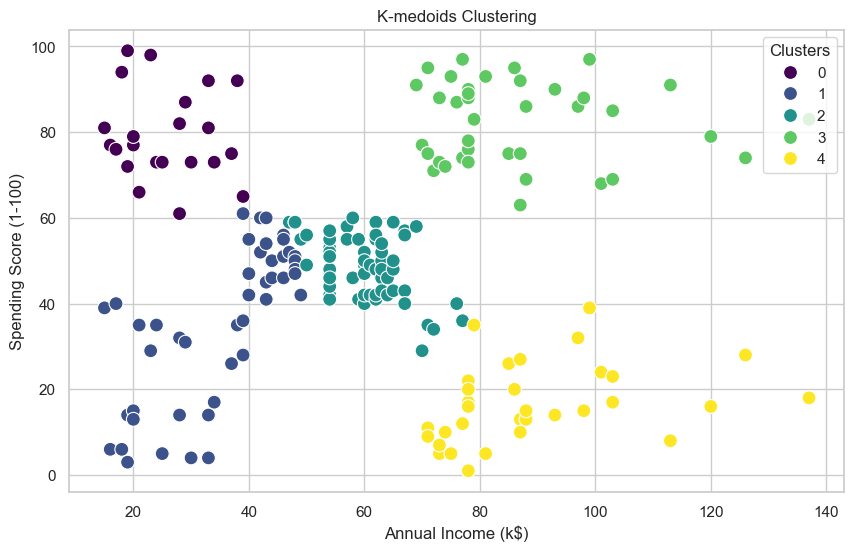

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have the 'customer_data' DataFrame
# and it contains a column 'Kmedoids_Labels'

# Use seaborn's style
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Kmedoids_Labels', data=customer_data, palette='viridis', s=100)

# Customize the plot
plt.title('K-medoids Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Clusters', loc='upper right')

# Show the plot
plt.show()


# C) DBSCAN


i) In DBSCAN, there is no need to specify the number of clusters to use it. All you need is a function to calculate the distance between values and some guidance for what amount of distance is considered “close”.<br>
ii) DBSCAN also produces more reasonable results than k-means<br>
iii) Density-Based Spatial Clustering of Applications with Noise (DBSCAN) is a base algorithm for density-based clustering. It can discover clusters of different shapes and sizes from a large amount of data, which is containing noise and outliers.

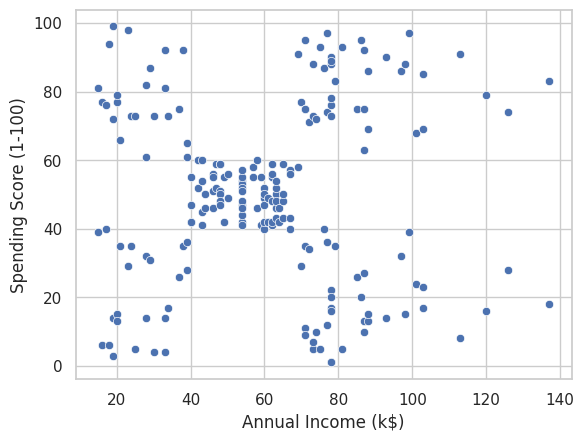

In [26]:
# a normal scatter plot without the classification of clusters
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=customer_data)
plt.show()

In [64]:
#passing two parameter epsilon and min sample)
#radius-->epsilon
#min_sample-->minimum number samples present inside the circle with minimum radius of epscilon

In [79]:
dbscan = DBSCAN(eps=0.5,min_samples=5)

In [80]:
# Selecting only numeric columns for clustering
numeric_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
numeric_data = customer_data[numeric_columns]

In [81]:
# Standardize the numeric data
scaler = StandardScaler()
scaler_data = scaler.fit_transform(numeric_data)

In [82]:
# Applying DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(scaler_data)

In [83]:
# Showing unique labels
print(np.unique(labels))

[-1  0  1  2  3  4  5]


In [84]:
#-1 are noise or outlier in dataset it is not  cluster

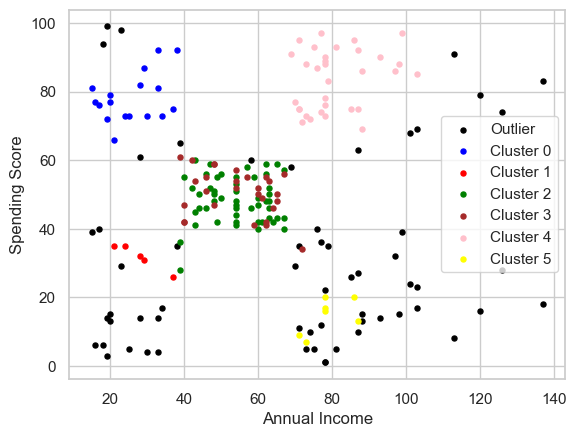

In [87]:
import matplotlib.pyplot as plt

# Assuming 'Annual Income' is the column name for x-axis
# Assuming 'Spending Score' is the column name for y-axis

# Visualizing the clusters
plt.scatter(customer_data.loc[labels == -1, 'Annual Income (k$)'], customer_data.loc[labels == -1, 'Spending Score (1-100)'], s=13, c='black', label='Outlier')
plt.scatter(customer_data.loc[labels == 0, 'Annual Income (k$)'], customer_data.loc[labels == 0, 'Spending Score (1-100)'], s=13, c='blue', label='Cluster 0')
plt.scatter(customer_data.loc[labels == 1, 'Annual Income (k$)'], customer_data.loc[labels == 1, 'Spending Score (1-100)'], s=13, c='red', label='Cluster 1')
plt.scatter(customer_data.loc[labels == 2, 'Annual Income (k$)'], customer_data.loc[labels == 2, 'Spending Score (1-100)'], s=13, c='green', label='Cluster 2')
plt.scatter(customer_data.loc[labels == 3, 'Annual Income (k$)'], customer_data.loc[labels == 3, 'Spending Score (1-100)'], s=13, c='brown', label='Cluster 3')
plt.scatter(customer_data.loc[labels == 4, 'Annual Income (k$)'], customer_data.loc[labels == 4, 'Spending Score (1-100)'], s=13, c='pink', label='Cluster 4')
plt.scatter(customer_data.loc[labels == 5, 'Annual Income (k$)'], customer_data.loc[labels == 5, 'Spending Score (1-100)'], s=13, c='yellow', label='Cluster 5')
# Repeat for other clusters if necessary

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()


# D) HIERARCHICAL CLUSTERING

i) It creates groups so that objects within a group are similar to each other and different from objects in other groups.<br> ii) Clusters are visually represented in a hierarchical tree called a dendrogram.<br>
iii) Decide on the number of clusters by cutting the dendrogram at a certain height.

Consider the following steps in an agglomerative hierarchical clustering:

Initialization:

Start with individual data points as clusters: A, B, C, D, E.
Iteration 1:

Merge the closest clusters: (A, B) C D E.
Iteration 2:

Merge the closest clusters: ((A, B), C) D E.
Iteration 3:

Merge the closest clusters: (((A, B), C), D) E.
Iteration 4:

Merge the closest clusters: ((((A, B), C), D), E).

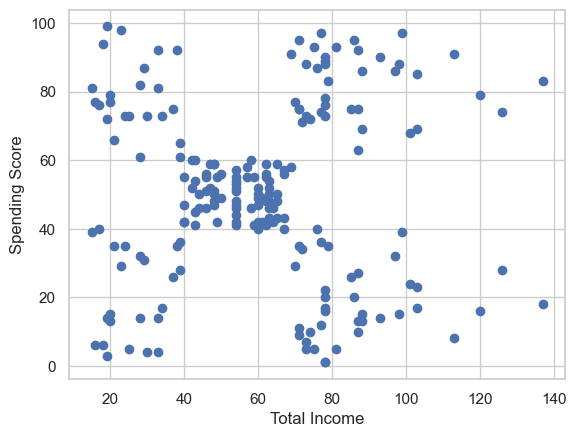

In [89]:
plt.scatter(X[...,0],X[...,1])
plt.xlabel('Total Income')
plt.ylabel('Spending Score')
plt.show()

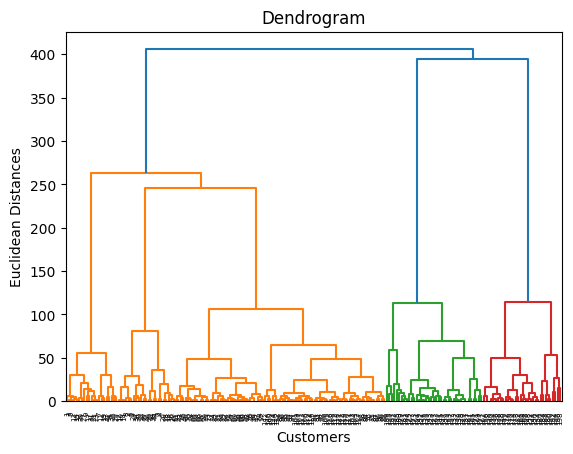

In [ ]:
dendrogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

In [91]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
Y_ac = ac.fit_predict(X)
Y_ac

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

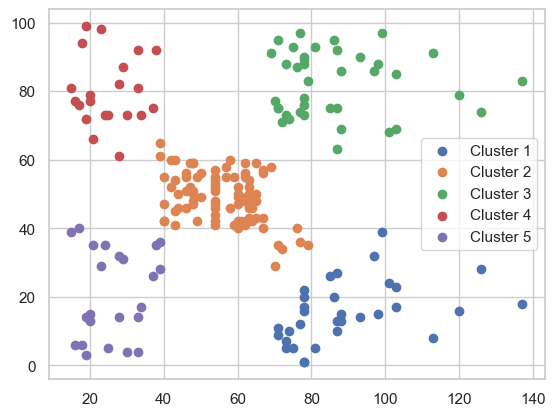

In [92]:
plt.scatter(X[Y_ac==0,0],X[Y_ac==0,1],label='Cluster 1')
plt.scatter(X[Y_ac==1,0],X[Y_ac==1,1],label='Cluster 2')
plt.scatter(X[Y_ac==2,0],X[Y_ac==2,1],label='Cluster 3')
plt.scatter(X[Y_ac==3,0],X[Y_ac==3,1],label='Cluster 4')
plt.scatter(X[Y_ac==4,0],X[Y_ac==4,1],label='Cluster 5')

plt.legend()
plt.show()

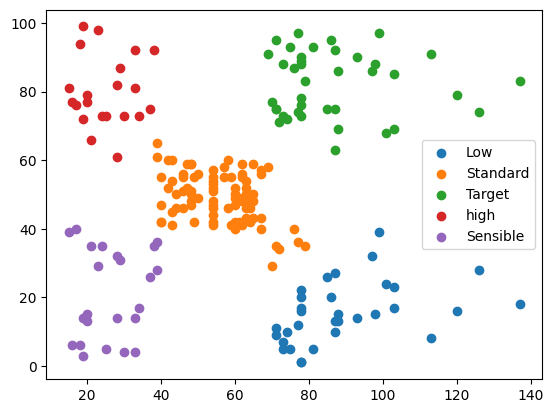

In [ ]:
plt.scatter(X[Y_hc==0,0],X[Y_hc==0,1],label='Low')
plt.scatter(X[Y_hc==1,0],X[Y_hc==1,1],label='Standard')
plt.scatter(X[Y_hc==2,0],X[Y_hc==2,1],label='Target')
plt.scatter(X[Y_hc==3,0],X[Y_hc==3,1],label='high')
plt.scatter(X[Y_hc==4,0],X[Y_hc==4,1],label='Sensible')

plt.legend()
plt.show()

In [94]:
#Displaying our target and high customers
customer_data['Target']=Y_ac
customer_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Kmedoids_Labels,Target
0,1,0,19,15,39,1,4
1,2,0,21,15,81,0,3
2,3,1,20,16,6,1,4
3,4,1,23,16,77,0,3
4,5,1,31,17,40,1,4
...,...,...,...,...,...,...,...
195,196,1,35,120,79,3,2
196,197,1,45,126,28,4,0
197,198,0,32,126,74,3,2
198,199,0,32,137,18,4,0


In [95]:
customer_data['High']=Y_ac
customer_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Kmedoids_Labels,Target,High
0,1,0,19,15,39,1,4,4
1,2,0,21,15,81,0,3,3
2,3,1,20,16,6,1,4,4
3,4,1,23,16,77,0,3,3
4,5,1,31,17,40,1,4,4
...,...,...,...,...,...,...,...,...
195,196,1,35,120,79,3,2,2
196,197,1,45,126,28,4,0,0
197,198,0,32,126,74,3,2,2
198,199,0,32,137,18,4,0,0


# E) HDBSCAN CLUSTERING

i) HDBSCAN (Hierarchical Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that extends the concepts of DBSCAN (Density-Based Spatial Clustering of Applications with Noise) and creates a hierarchy of clusters.<br>
ii) HDBSCAN was introduced to address some limitations of traditional clustering algorithms, such as the need to specify the number of clusters in advance and the sensitivity to the shape and size of clusters.

Clustering Basically is:

# 7) EVALUATION METRICS


i) Silhouette Score - compares the similarity of data points within the same cluster to data points in different clusters. <br>
ii) Davies-Bouldin Index - Estimates the average similarity between each cluster and its most comparable cluster. It evaluates the clustering quality by considering the separation between clusters <br>
iii) Calinski-Harabasz Index - Measures the similarity between true and predicted cluster assignments, correcting for chance.


In [113]:
silhouette = silhouette_score(X, kmeans.labels_)
db_index = davies_bouldin_score(X, kmeans.labels_)
ch_index = calinski_harabasz_score(X, kmeans.labels_)
 
# Print the metric scores
print(f"Silhouette Score: {silhouette:.2f}")
print(f"Davies-Bouldin Index: {db_index:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.55
Davies-Bouldin Index: 0.57
Calinski-Harabasz Index: 247.36


Thus, the customers from the given dataset are clustered into clusters with maximum similarity within points in the clusters and maximum seperation between the clusters!

The group of customers who must be targeted by the company is predicted and clustered together which helps to introduce new marketing strategies and perform optimistic resource allocations